<a href="https://colab.research.google.com/github/Auwal007/Bank-Marketing-Classification/blob/main/classification_bank_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [6]:
# Getting the dataset
import os

local_path = 'Data/bank-full.csv'
drive_path = '/content/drive/MyDrive/Datasets/bank-full.csv'

if os.path.exists(local_path):
    print("Loading data from local path...")
    df = pd.read_csv(local_path, delimiter=';')
else:
    print("Local file not found. Mounting Google Drive...")
    from google.colab import drive
    drive.mount('/content/drive')

    if os.path.exists(drive_path):
        print("Loading data from Google Drive...")
        df = pd.read_csv(drive_path, delimiter=';')
    else:
        raise FileNotFoundError("File not found in either local path or Google Drive.")


Local file not found. Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading data from Google Drive...


In [7]:

# display first few rows
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
# Display the last few rows
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [9]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
# The "duration" is a key predictor of the outcome but should be excluded from realistic models since it's only known after the call.
df = df.drop('duration', axis=1)

In [11]:
df.nunique()


,0
age,77
job,12
marital,3
education,4
default,2
balance,7168
housing,2
loan,2
contact,3
day,31


In [12]:
df.describe()

,age,balance,day,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


In [13]:
# check for missing values
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [14]:
# Select only object columns
obj_cols = df.select_dtypes(include='object')


for col in obj_cols.columns:
  print(f'{col}: {df[col].unique()}')

job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital: ['married' 'single' 'divorced']
education: ['tertiary' 'secondary' 'unknown' 'primary']
default: ['no' 'yes']
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['unknown' 'cellular' 'telephone']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome: ['unknown' 'failure' 'other' 'success']
y: ['no' 'yes']


In [15]:
for col in obj_cols.columns:
    unknown_count = (obj_cols[col] == 'unknown').sum()
    other_count = (obj_cols[col] == 'other').sum()
    if unknown_count > 0 or other_count > 0:
        print(f"{col}: 'unknown' = {unknown_count}, 'other' = {other_count}")


job: 'unknown' = 288, 'other' = 0
education: 'unknown' = 1857, 'other' = 0
contact: 'unknown' = 13020, 'other' = 0
poutcome: 'unknown' = 36959, 'other' = 1840


In [16]:
for col in obj_cols.columns:
    total = len(obj_cols[col])
    unknown_pct = round((obj_cols[col] == 'unknown').sum() / total * 100, 2)
    other_pct = round((obj_cols[col] == 'other').sum() / total * 100, 2)
    if unknown_pct > 0 or other_pct > 0:
        # print(f"{col}: 'unknown' = {unknown_pct:.2f}%, 'other' = {other_pct:.2f}%")
        print(f"The percentage of other and unknown for {col} is: {unknown_pct + other_pct} %")


The percentage of other and unknown for job is: 0.64 %
The percentage of other and unknown for education is: 4.11 %
The percentage of other and unknown for contact is: 28.8 %
The percentage of other and unknown for poutcome is: 85.82 %


Unknown is a missing data not a category, So we'll deal with that shortly

In [17]:
# I will just have to drop "poutcome" because the missing data  on the column is way too much.
df = df.drop('poutcome', axis=1)

In [18]:
# Dealing with the missing data (unknown category)

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

# List of categorical columns you want to impute
cols_to_impute = ['contact', 'job', 'education']

# Make a copy of the original DataFrame to work with
df_copy = df.copy()

# Store encoders to decode later
encoders = {}

# Step 1: Encode columns and replace 'unknown' with NaN
for col in cols_to_impute:
    encoder = LabelEncoder()
    df_copy[col + '_encoded'] = encoder.fit_transform(df_copy[col].astype(str))
    df_copy[col + '_encoded'] = df_copy[col + '_encoded'].where(df_copy[col] != 'unknown', np.nan)
    encoders[col] = encoder  # Save encoder for decoding

# Step 2: Apply KNN imputer to encoded columns
imputer = KNNImputer(n_neighbors=5)
encoded_cols = [col + '_encoded' for col in cols_to_impute]
df_copy[encoded_cols] = imputer.fit_transform(df_copy[encoded_cols])

# Step 3: Decode back to original categories
for col in cols_to_impute:
    df_copy[col] = encoders[col].inverse_transform(df_copy[col + '_encoded'].round().astype(int))
    df_copy.drop(columns=[col + '_encoded'], inplace=True)

# Step 4: Replace original DataFrame if needed
df = df_copy.copy()


In [19]:
for col in ['contact', 'education', 'job']:
    print(f"Unique values in {col}: {df[col].unique()}")


Unique values in contact: ['cellular' 'telephone']
Unique values in education: ['tertiary' 'secondary' 'primary']
Unique values in job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student']


In [20]:
obj_cols = df.select_dtypes(include='object')

for col in obj_cols.columns:
  print(f'{col}: {df[col].unique()}')

job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
marital: ['married' 'single' 'divorced']
education: ['tertiary' 'secondary' 'primary']
default: ['no' 'yes']
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['cellular' 'telephone']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
y: ['no' 'yes']


Handling Outliers

<Axes: >

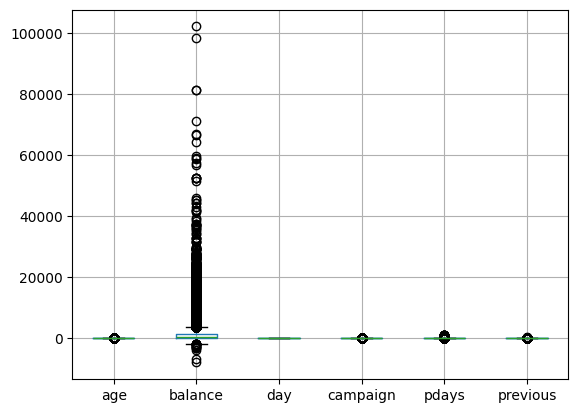

In [21]:
df.boxplot()


,0
age,"Axes(0.125,0.653529;0.227941x0.226471)"
balance,"Axes(0.398529,0.653529;0.227941x0.226471)"
day,"Axes(0.672059,0.653529;0.227941x0.226471)"
campaign,"Axes(0.125,0.381765;0.227941x0.226471)"
pdays,"Axes(0.398529,0.381765;0.227941x0.226471)"
previous,"Axes(0.672059,0.381765;0.227941x0.226471)"


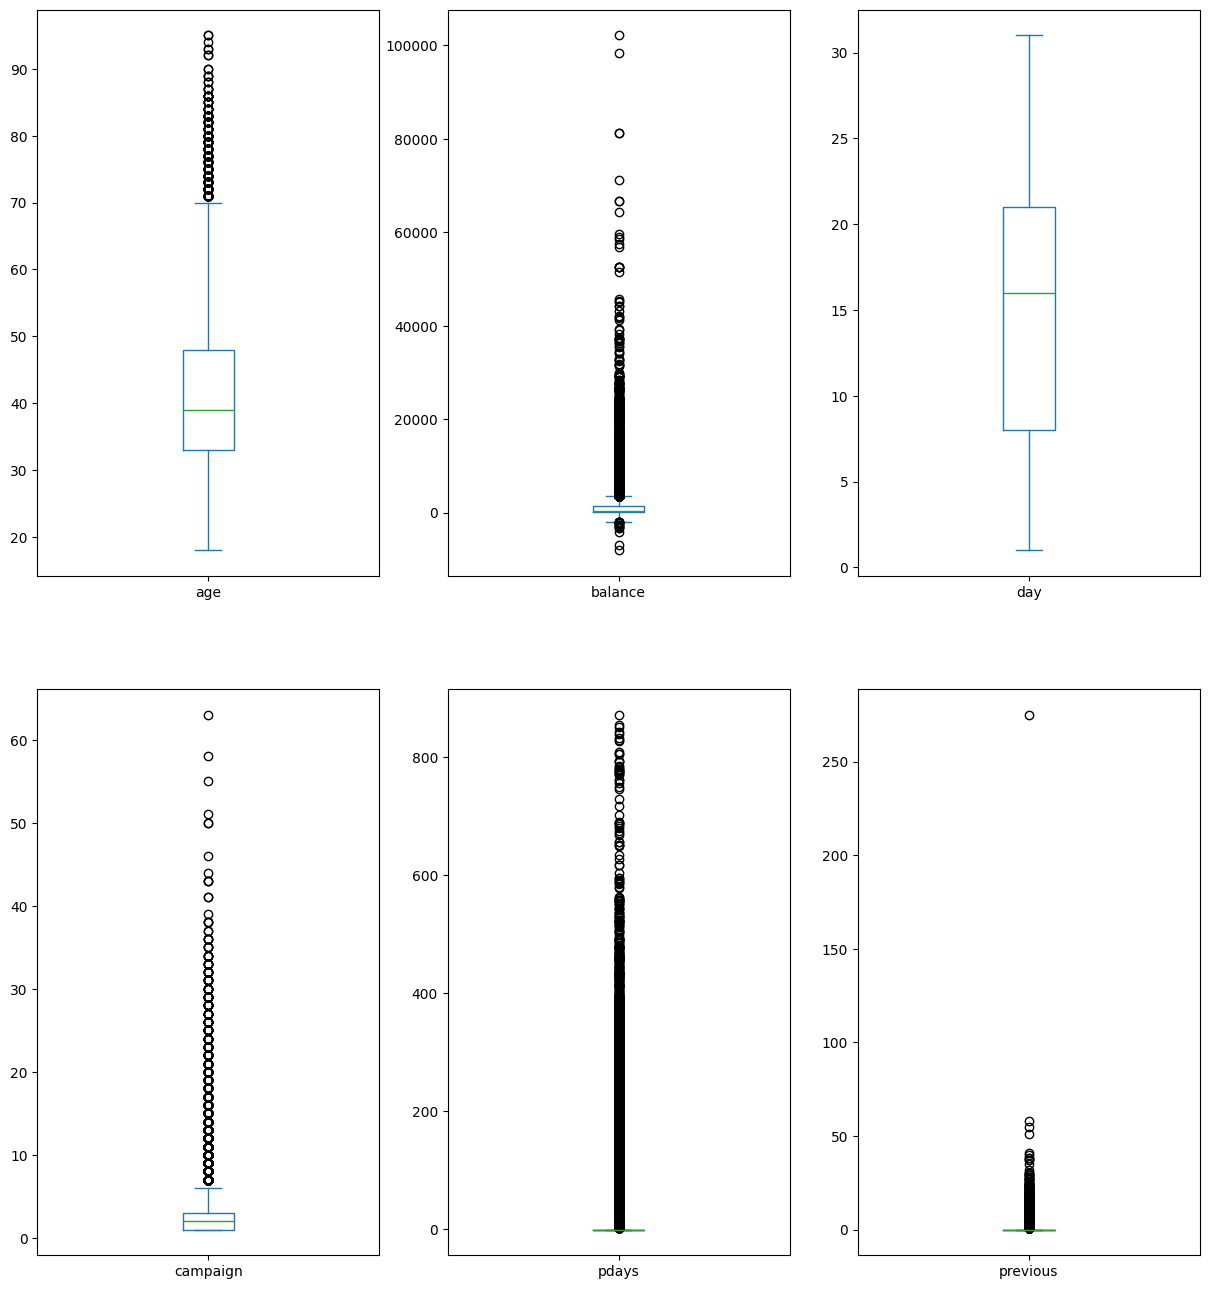

In [22]:
df.plot(kind="box", subplots=True, figsize=(15, 25), layout=(3, 3))


In [23]:
def remove_outliers(df, column, lower_quantile=0.25, upper_quantile=0.75):
    Q1 = df[column].quantile(lower_quantile)
    Q3 = df[column].quantile(upper_quantile)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from selected columns
df = remove_outliers(df, 'balance')          # 25th-75th percentile
df = remove_outliers(df, 'campaign', 0.10, 0.90)  # 10th-90th percentile
df = remove_outliers(df, 'previous', 0.10, 0.90)  # 10th-90th percentile
df = remove_outliers(df, 'age')              # 25th-75th percentile



,0
age,"Axes(0.125,0.653529;0.227941x0.226471)"
balance,"Axes(0.398529,0.653529;0.227941x0.226471)"
day,"Axes(0.672059,0.653529;0.227941x0.226471)"
campaign,"Axes(0.125,0.381765;0.227941x0.226471)"
pdays,"Axes(0.398529,0.381765;0.227941x0.226471)"
previous,"Axes(0.672059,0.381765;0.227941x0.226471)"


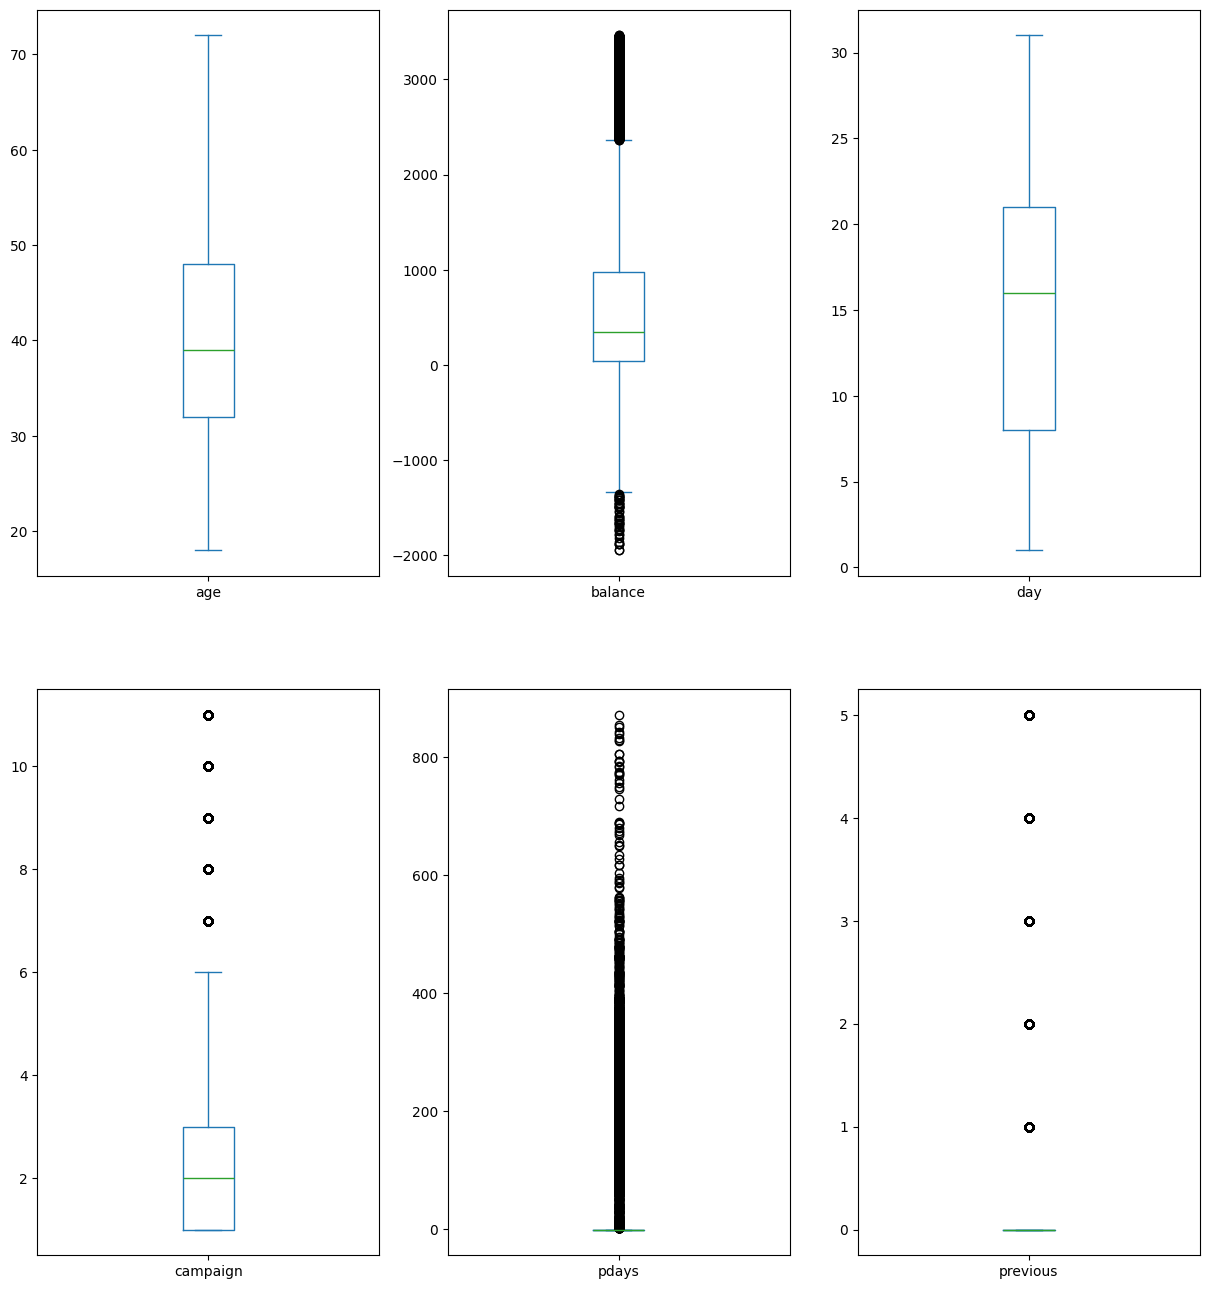

In [24]:
df.plot(kind="box", subplots=True, figsize=(15, 25), layout=(3, 3))


<Axes: >

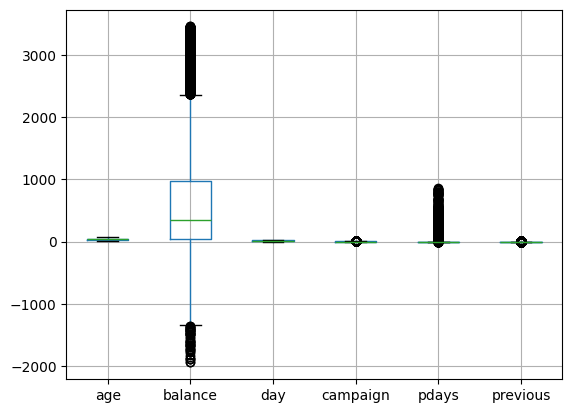

In [25]:
df.boxplot()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38356 entries, 0 to 45209
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        38356 non-null  int64 
 1   job        38356 non-null  object
 2   marital    38356 non-null  object
 3   education  38356 non-null  object
 4   default    38356 non-null  object
 5   balance    38356 non-null  int64 
 6   housing    38356 non-null  object
 7   loan       38356 non-null  object
 8   contact    38356 non-null  object
 9   day        38356 non-null  int64 
 10  month      38356 non-null  object
 11  campaign   38356 non-null  int64 
 12  pdays      38356 non-null  int64 
 13  previous   38356 non-null  int64 
 14  y          38356 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.7+ MB


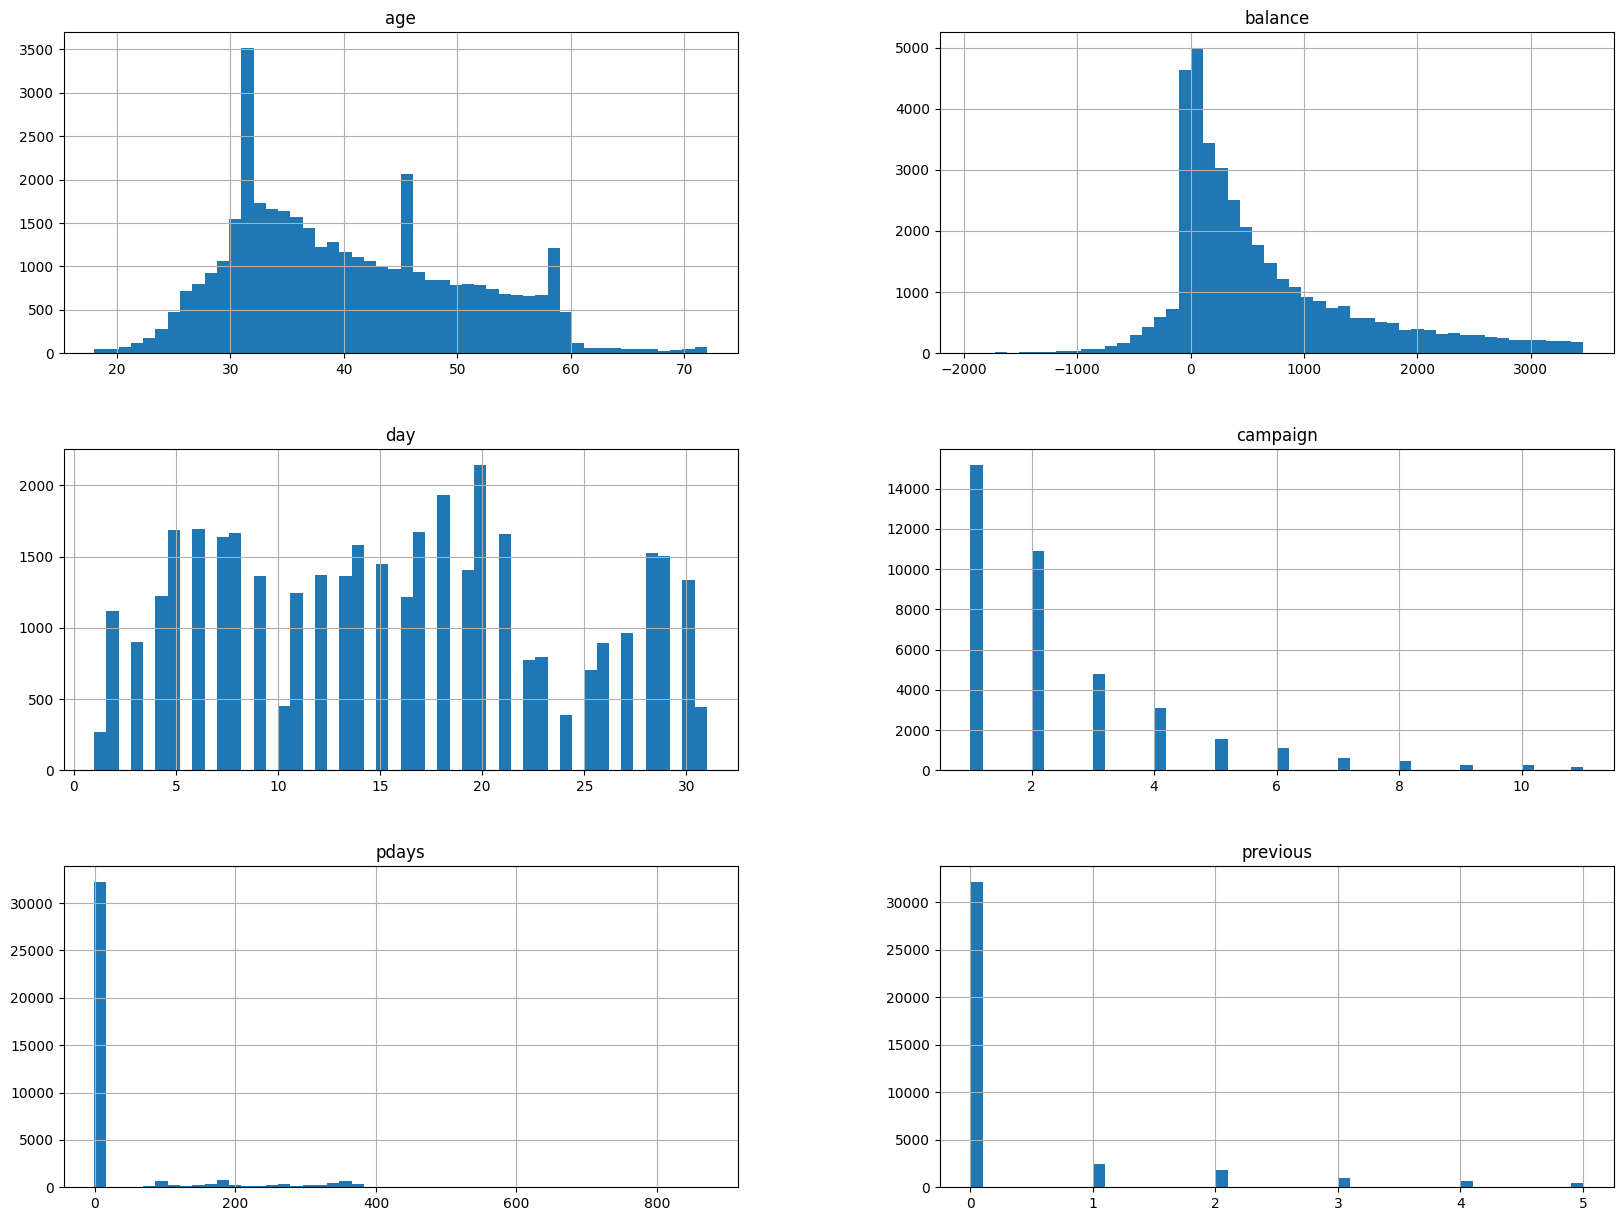

In [27]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [28]:
df.shape


(38356, 15)

# EDA


### Q1: How does job affect loan?



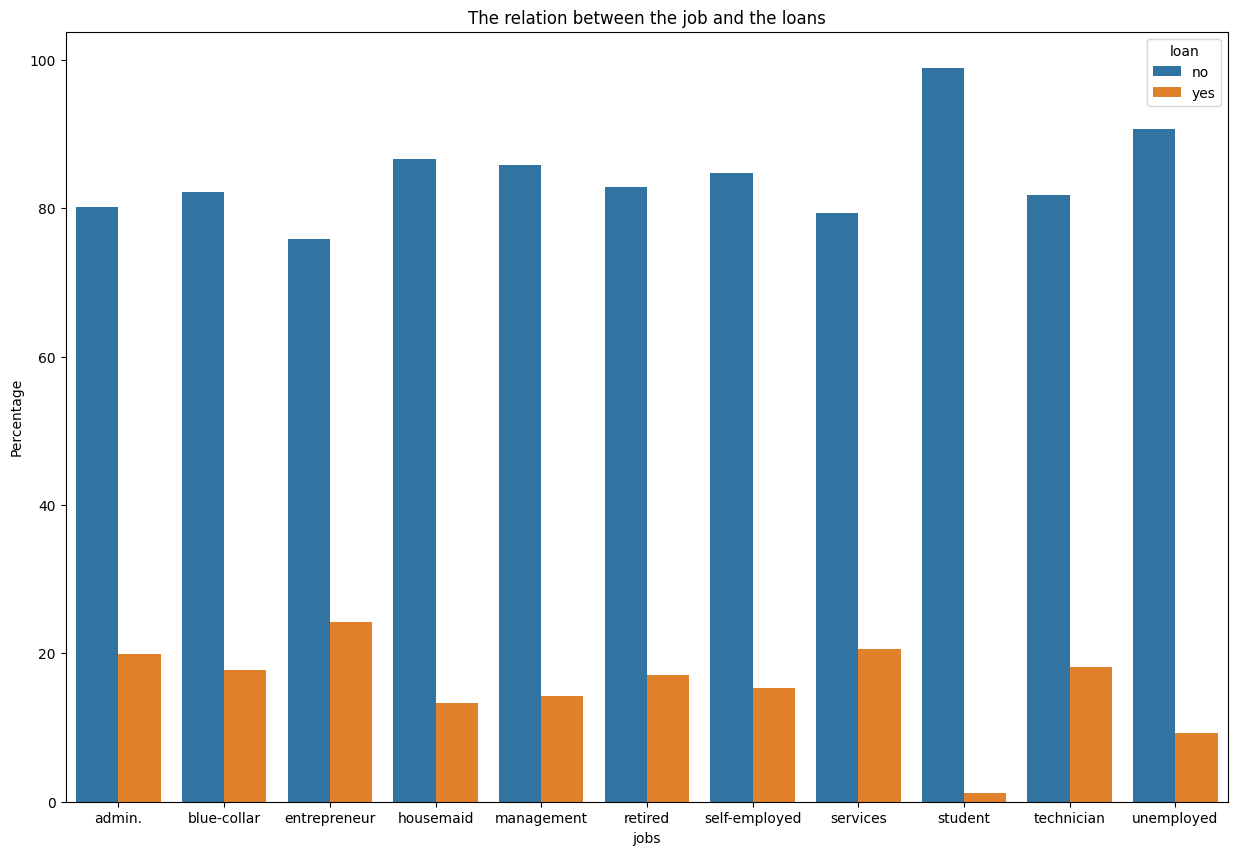

In [29]:
plt.figure(figsize=(15,10))

# Calculate the percentages
df_percentages = df.groupby('job')['loan'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

# Plot the data
sns.barplot(x='job', y='percent', hue='loan', data=df_percentages) #palette=colors)

plt.title("The relation between the job and the loans")
plt.xlabel("jobs")
plt.ylabel("Percentage")

plt.show()

### Q2: Which contact method is more effective in terms of percuading customers to subscribe?



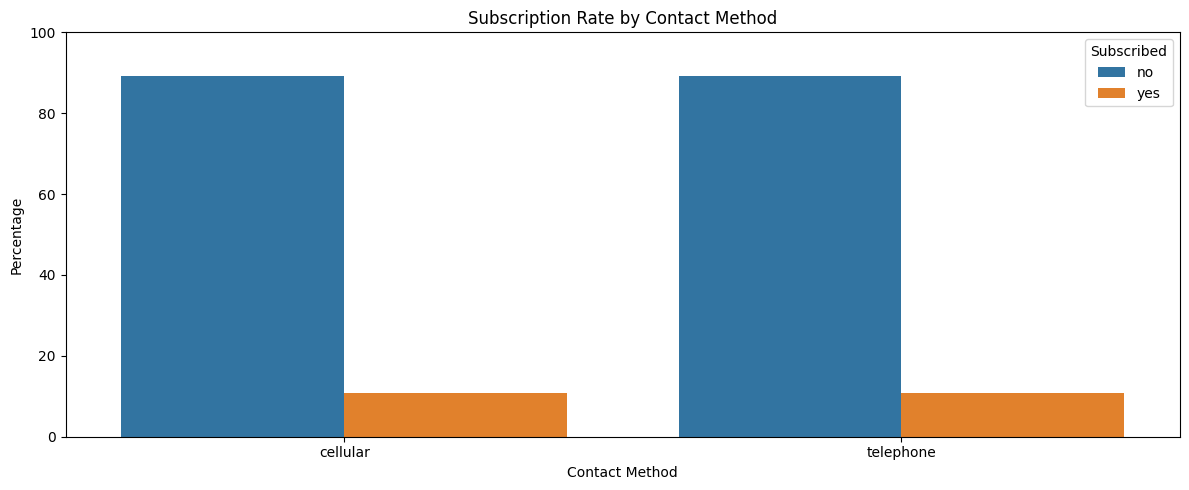

In [30]:
plt.figure(figsize=(12, 5))

# Calculate % of 'y' (yes/no) within each contact type
df_percentages = (
    df.groupby('contact')['y']
    .value_counts(normalize=True)
    .mul(100)
    .rename('percent')
    .reset_index()
)

# Plot the percentage distribution
sns.barplot(x='contact', y='percent', hue='y', data=df_percentages)

plt.title("Subscription Rate by Contact Method")
plt.ylabel("Percentage")
plt.xlabel("Contact Method")
plt.ylim(0, 100)
plt.legend(title='Subscribed')
plt.tight_layout()
plt.show()


### Q3: How does job affect Y?



<ipython-input-31-cea032cd7688>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


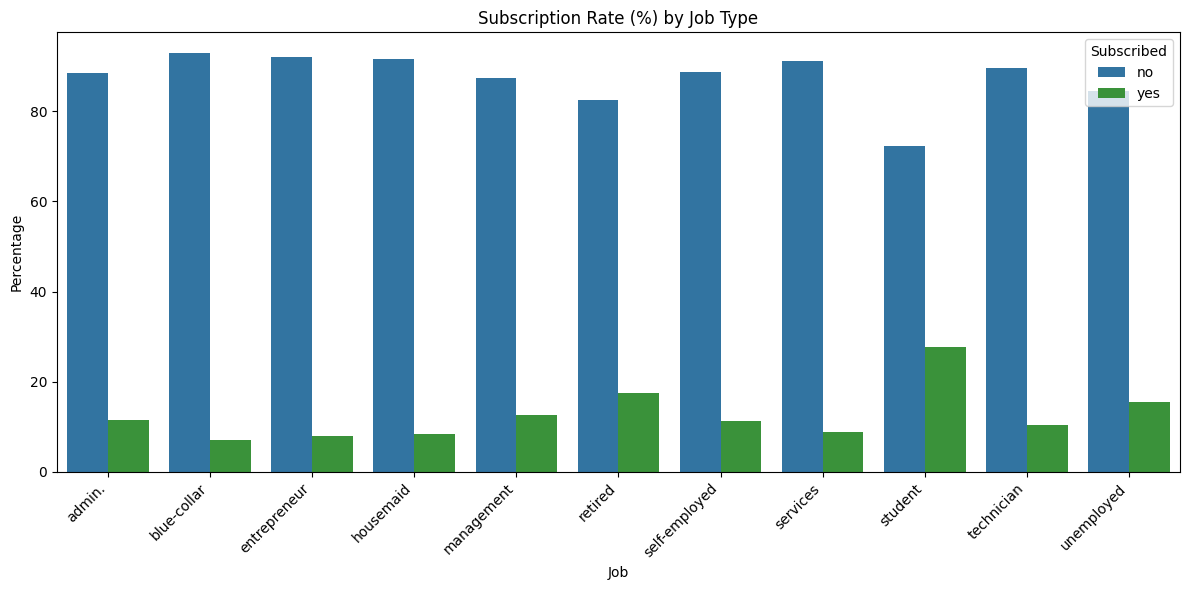

In [31]:
colors = ['#1f77b4', '#2ca02c']  # 'no' = blue, 'yes' = green

# Calculate percentage values
grouped = (
    df.groupby('job')['y']
    .value_counts(normalize=True)
    .mul(100)
    .rename('percent')
    .reset_index()
)

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='job', y='percent', hue='y', data=grouped, palette=colors)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Subscription Rate (%) by Job Type')
plt.ylabel('Percentage')
plt.xlabel('Job')
plt.legend(title='Subscribed')
plt.tight_layout()
plt.show()


### Q4: How does Marital status affect Y?



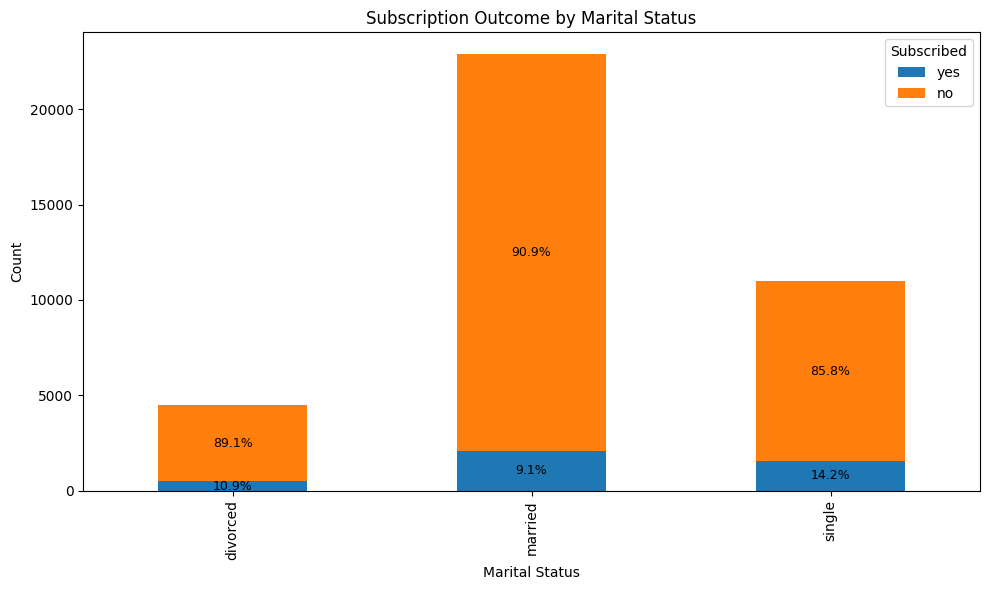

In [32]:
grouped = df.groupby('marital')['y'].value_counts().unstack()[['yes', 'no']]

# Plot the stacked bar chart
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Subscription Outcome by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Subscribed')

# Calculate percentages
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Annotate with percentage labels
for i, index in enumerate(grouped.index):
    cumulative = 0
    for j, column in enumerate(grouped.columns):
        height = grouped.loc[index, column]
        percentage = percentages.loc[index, column]
        plt.text(i, cumulative + height / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=9)
        cumulative += height

plt.tight_layout()
plt.show()

### Q6: How does financial status influence subscription decisions?



In [33]:
import plotly.express as px

fig = px.histogram(df,x='balance',color='y')
fig.show()

### Q7: How does age affect Y?



In [34]:


fig = px.histogram(df,x='age',color='y')
fig.show()

### Q8: How does housing loans affect Y?

In [35]:
# Calculate the counts for each group
grouped_df = df.groupby(['housing', 'y']).size().reset_index(name='counts')

# Calculate the percentages for each group
percentages = grouped_df.groupby('housing')['counts'].apply(lambda x: x / x.sum() * 100).reset_index(level=0, drop=True)

# Assign the percentages to a new column in grouped_df
grouped_df['percentages'] = percentages

# Create the bar chart
fig = px.bar(grouped_df, x='housing', y='counts', color='y',
             text=grouped_df['percentages'].apply(lambda x: f'{x:.2f}%'))

fig.show()

### Q9: What are the key customer segments based on demographic (education) with subscription?

In [36]:
fig = px.histogram(df, x="y",color = 'education')
fig.show()

### Q10: How does default affect Y?



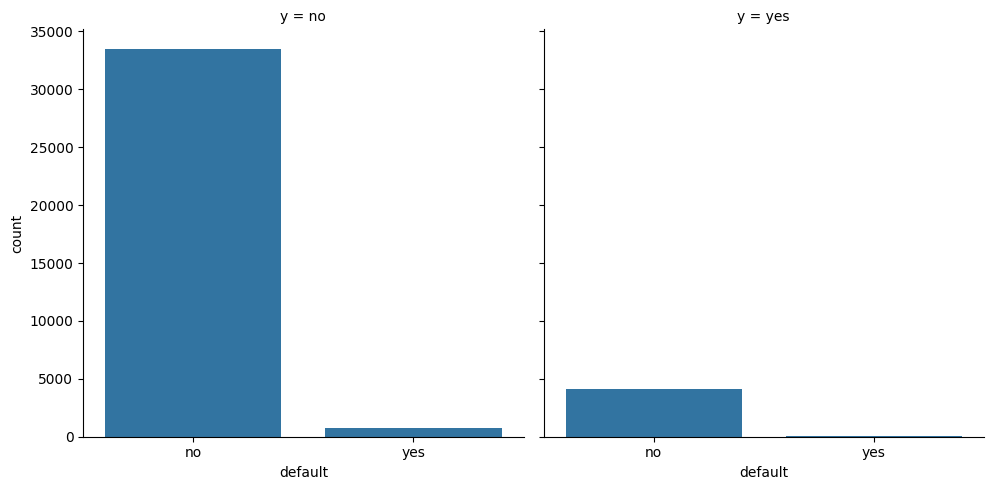

In [37]:
sns.catplot(data=df , x="default" , col="y",kind='count')


📌 **Conclusions**

Q1: Students are less likely to take personal loans, whereas individuals in technical or business roles (e.g., entrepreneurs, technicians, and managers) are more likely to do so.

Q2: Customers contacted via cellular phones are more receptive to subscribing to term deposits.

Q3: Students show the highest likelihood of subscribing to term deposits compared to other professions.

Q4: Single individuals are more likely to subscribe to term deposits than married ones, despite being fewer in number.

Q5: Longer call durations significantly increase the chances of customers subscribing to term deposits.

Q6: Customers with account balances between 0 and 1000 are more inclined to subscribe.

Q7: Younger individuals (under 50–60 years old) are more likely to subscribe to term deposits.

Q8: Those without housing loans tend to show a greater interest in term deposits.

Q9: Customers with secondary education are more likely to subscribe than those with other education levels.

Q10: Customers with credit defaults are typically not subscribed to term deposits.

# Preparing data for machine learning model

### Encoding

In [38]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,1,-1,0,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,1,-1,0,no
4,33,management,single,secondary,no,1,no,no,cellular,5,may,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,1,-1,0,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,2,-1,0,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,2,-1,0,yes


In [39]:
df.shape


(38356, 15)

In [40]:
cat_features = df.select_dtypes(include=['object', 'bool']).columns.values
print(cat_features)

['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'y']


In [41]:
# Apply one-hot encoding to nonimal categorical columns
data_encoded = pd.get_dummies(df, columns=['job', 'marital',  'contact', 'default', 'housing', 'loan'])

In [42]:
# Apply one-hot encoding to ordinal categorical columns


from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'y' column to numerical values
data_encoded['y'] = label_encoder.fit_transform(data_encoded['y'])

# Fit and transform the 'month' column to numerical values
data_encoded['month'] = label_encoder.fit_transform(data_encoded['month'])

# Fit and transform the 'education' column to numerical values

data_encoded['education'] = label_encoder.fit_transform(data_encoded['education'])

In [43]:
# Display all columns
pd.set_option('display.max_columns', None)


In [44]:
data_encoded

,age,education,balance,day,month,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,58,2,2143,5,8,1,-1,0,0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,True,False,False,True,True,False
1,44,1,29,5,8,1,-1,0,0,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,True,False,False,True,True,False
2,33,1,2,5,8,1,-1,0,0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,True,False,True
3,47,1,1506,5,8,1,-1,0,0,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,True,True,False
4,33,1,1,5,8,1,-1,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,2,113,17,9,1,-1,0,1,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False,True,False,True,False
45205,25,1,505,17,9,2,-1,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,True,False,True,False,False,True
45206,51,2,825,17,9,3,-1,0,1,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,True,False,True,False,True,False
45207,71,0,1729,17,9,2,-1,0,1,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,True,False,True,False,True,False


In [45]:
data_encoded.info()


<class 'pandas.core.frame.DataFrame'>
Index: 38356 entries, 0 to 45209
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                38356 non-null  int64
 1   education          38356 non-null  int64
 2   balance            38356 non-null  int64
 3   day                38356 non-null  int64
 4   month              38356 non-null  int64
 5   campaign           38356 non-null  int64
 6   pdays              38356 non-null  int64
 7   previous           38356 non-null  int64
 8   y                  38356 non-null  int64
 9   job_admin.         38356 non-null  bool 
 10  job_blue-collar    38356 non-null  bool 
 11  job_entrepreneur   38356 non-null  bool 
 12  job_housemaid      38356 non-null  bool 
 13  job_management     38356 non-null  bool 
 14  job_retired        38356 non-null  bool 
 15  job_self-employed  38356 non-null  bool 
 16  job_services       38356 non-null  bool 
 17  job_student      

In [46]:
data_encoded.shape


(38356, 31)

### Splitting test and training set

In [47]:
from sklearn.model_selection import train_test_split


X = data_encoded.drop(columns=['y'])
y = data_encoded['y']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
X.shape

(38356, 30)

In [49]:
y.shape

(38356,)

In [50]:
# Calculate the distribution of the target variable 'y'
before_sampling = y.value_counts(normalize=True) * 100
print("Before sampling:\n", before_sampling)

Before sampling:
 y
0    89.214204
1    10.785796
Name: proportion, dtype: float64


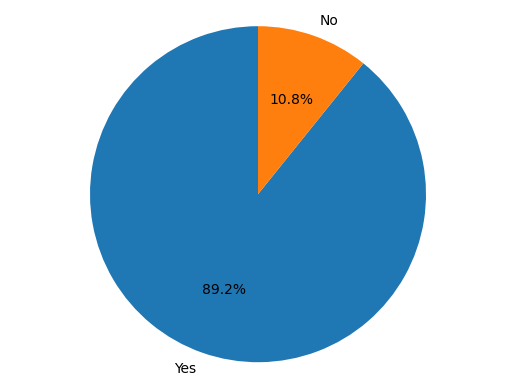

In [51]:
# Create a pie chart to visualize the class distribution after SMOTE
labels = ['Yes', 'No']
sizes = before_sampling.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [52]:
# Apply SMOTE for class balancing
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=123)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [53]:
# Calculate the distribution of the resampled target variable 'y'
after_sampling = pd.Series(y_resampled).value_counts(normalize=True) * 100
print("After sampling:\n", after_sampling)

After sampling:
 y
0    50.0
1    50.0
Name: proportion, dtype: float64


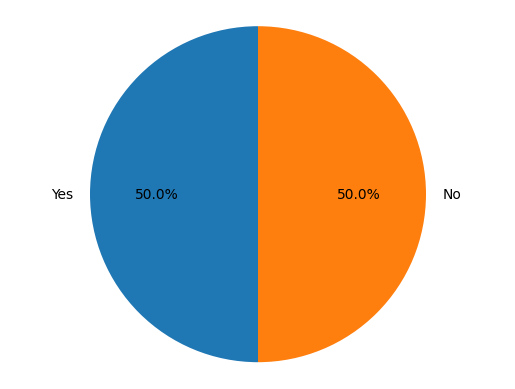

In [54]:
# Create a pie chart to visualize the class distribution after SMOTE
labels = ['Yes', 'No']
sizes = after_sampling.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [55]:
# Concatenate the resampled 'X' and 'y' to form a new DataFrame
resampled_data = pd.concat([X_resampled, pd.Series(y_resampled, name='y')], axis=1)

In [56]:
# Separate features (X) and the target variable (y) from the resampled data
X_resampled = resampled_data.drop('y', axis=1)
y_resampled = resampled_data['y']

# Split the data into training and testing sets (e.g., 80% for training and 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Choosing Model

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Okay, now is the time to choose a model, i  will loop throug 5 different models at a time to see which will perform best.


=== KNN ===
Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      6763
           1       0.96      0.89      0.92      6925

    accuracy                           0.93     13688
   macro avg       0.93      0.93      0.93     13688
weighted avg       0.93      0.93      0.93     13688


Confusion Matrix for Test Set:
[[6506  257]
 [ 748 6177]]


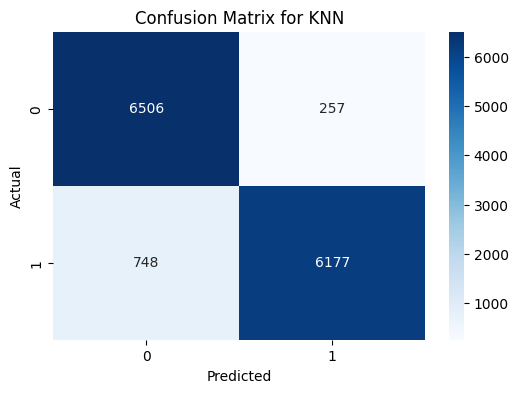


=== Logistic Regression ===
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      6763
           1       0.99      0.85      0.91      6925

    accuracy                           0.92     13688
   macro avg       0.93      0.92      0.92     13688
weighted avg       0.93      0.92      0.92     13688


Confusion Matrix for Test Set:
[[6693   70]
 [1050 5875]]


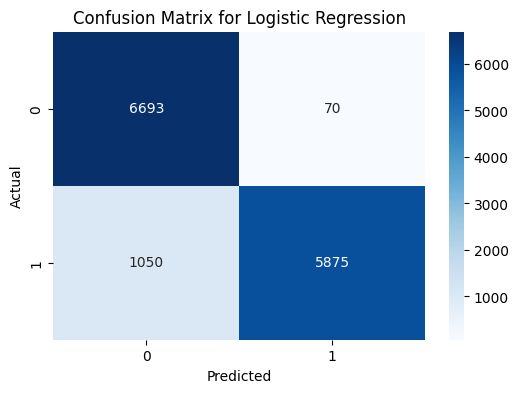


=== Random Forest ===
Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6763
           1       0.97      0.91      0.94      6925

    accuracy                           0.94     13688
   macro avg       0.94      0.94      0.94     13688
weighted avg       0.94      0.94      0.94     13688


Confusion Matrix for Test Set:
[[6588  175]
 [ 656 6269]]


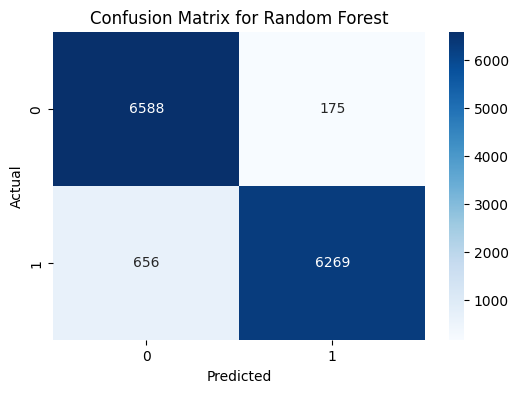


=== XGBoost ===
Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6763
           1       0.97      0.90      0.93      6925

    accuracy                           0.94     13688
   macro avg       0.94      0.94      0.94     13688
weighted avg       0.94      0.94      0.94     13688


Confusion Matrix for Test Set:
[[6594  169]
 [ 708 6217]]


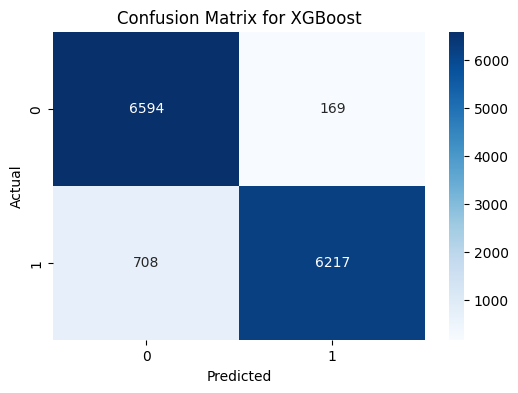


=== Decision Tree ===
Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      6763
           1       0.89      0.91      0.90      6925

    accuracy                           0.89     13688
   macro avg       0.90      0.89      0.89     13688
weighted avg       0.90      0.89      0.89     13688


Confusion Matrix for Test Set:
[[5947  816]
 [ 624 6301]]


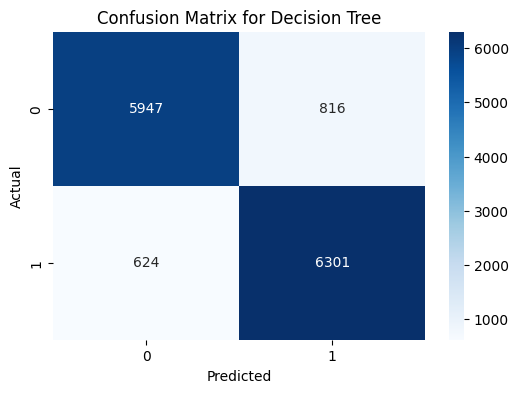

In [58]:
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier

# Put your models in a dictionary
models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Function to fit, score, and report about each model
def fit_score_report(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        model_scores[name] = score

        # Make predictions
        y_pred = model.predict(X_test)

        # Print classification report
        print(f"\n=== {name} ===")
        print(f"Accuracy: {score:.2f}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))

        # Generate a confusion matrix for the test set
        print("\nConfusion Matrix for Test Set:")
        cm = confusion_matrix(y_test, y_pred)
        print(cm)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix for {name}')
        plt.show()

    return model_scores

# Run the function
model_scores = fit_score_report(models, X_train, X_test, y_train, y_test)


From the above information, I see that  `Random Forest` and `xgboost` performs best, So i will move on to hyperameter tuning with them. But before then, let's see see the `Feature Importance` of the two models.

Random Forest - Training Accuracy: 0.9999634703196347
Random Forest - Test Accuracy: 0.9392898889538281

=== Random Forest ===
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6763
           1       0.97      0.91      0.94      6925

    accuracy                           0.94     13688
   macro avg       0.94      0.94      0.94     13688
weighted avg       0.94      0.94      0.94     13688


Confusion Matrix:
[[6588  175]
 [ 656 6269]]


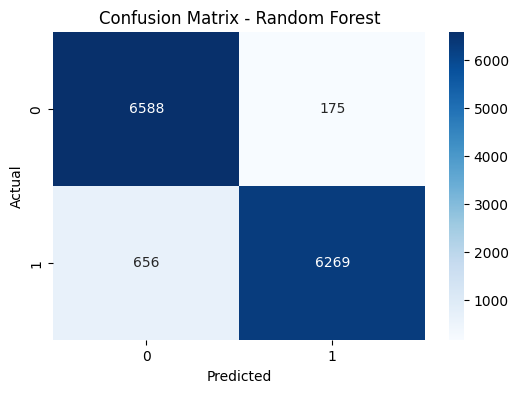

In [59]:
# Training Random Forest

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# retrain Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on training set
y_train_pred = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Random Forest - Training Accuracy:", train_accuracy)

# Predict on test set
y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Random Forest - Test Accuracy:", test_accuracy)

# Evaluation
print("\n=== Random Forest ===")
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


XGBoost - Training Accuracy: 0.9519634703196347
XGBoost - Test Accuracy: 0.9359292811221508

=== XGBoost ===
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6763
           1       0.97      0.90      0.93      6925

    accuracy                           0.94     13688
   macro avg       0.94      0.94      0.94     13688
weighted avg       0.94      0.94      0.94     13688


Confusion Matrix:
[[6594  169]
 [ 708 6217]]


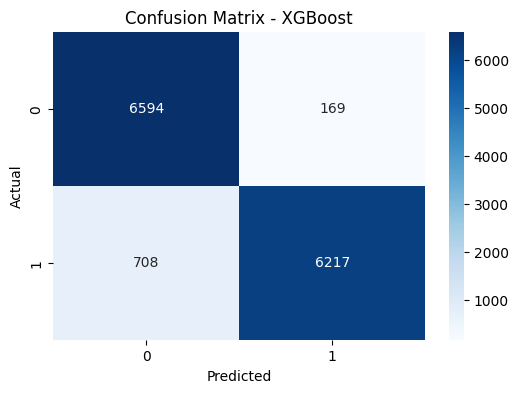

In [60]:
from xgboost import XGBClassifier

# retrain XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on training set
y_train_pred = xgb_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("XGBoost - Training Accuracy:", train_accuracy)

# Predict on test set
y_test_pred = xgb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("XGBoost - Test Accuracy:", test_accuracy)

# Evaluation
print("\n=== XGBoost ===")
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [61]:
type(X_train)

numpy.ndarray


Top 20 Features for Random Forest:

housing_yes: 0.1005
balance: 0.0834
age: 0.0670
housing_no: 0.0650
month: 0.0616
day: 0.0611
marital_married: 0.0535
job_blue-collar: 0.0493
marital_single: 0.0423
pdays: 0.0377
job_technician: 0.0373
loan_yes: 0.0355
campaign: 0.0345
marital_divorced: 0.0326
job_admin.: 0.0292
job_management: 0.0289
job_services: 0.0283
loan_no: 0.0249
previous: 0.0242
education: 0.0208


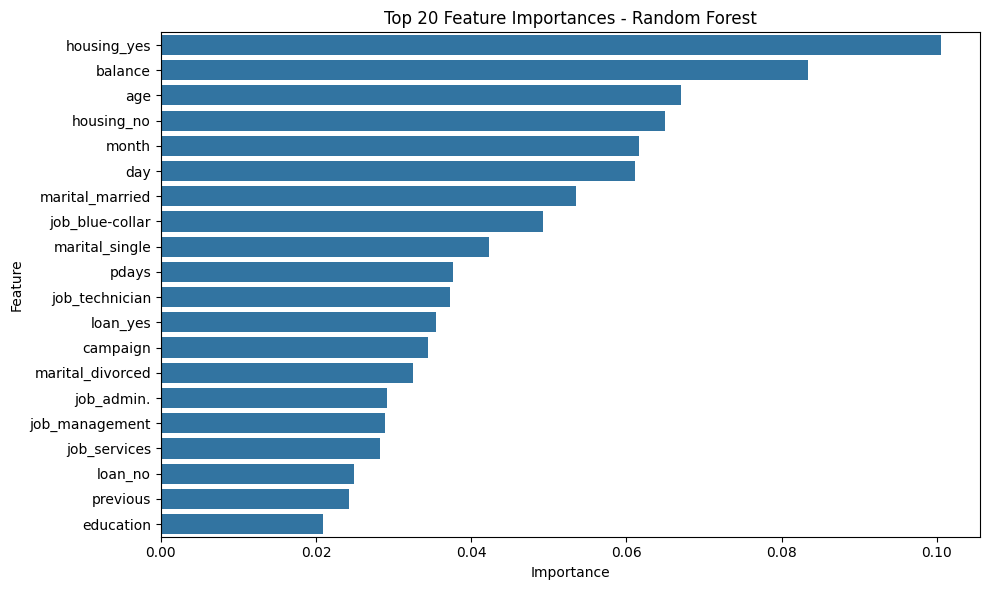


Top 20 Features for XGBoost:

housing_yes: 0.1493
marital_divorced: 0.1332
housing_no: 0.0939
marital_single: 0.0757
loan_yes: 0.0525
job_admin.: 0.0440
job_services: 0.0440
job_blue-collar: 0.0431
marital_married: 0.0372
job_technician: 0.0371
job_self-employed: 0.0364
loan_no: 0.0363
job_management: 0.0318
job_retired: 0.0273
job_housemaid: 0.0258
job_entrepreneur: 0.0245
job_unemployed: 0.0244
job_student: 0.0158
contact_cellular: 0.0155
contact_telephone: 0.0150


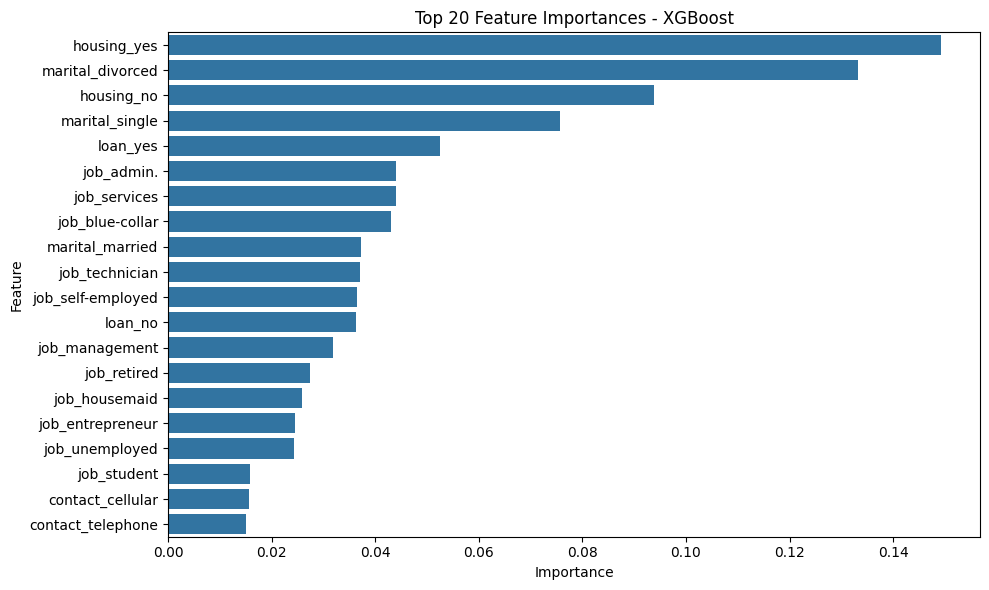

In [62]:
# Getting the feature importance
def plot_feature_importance(model, model_name, feature_names, top_n=20):
    importance = model.feature_importances_
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    }).sort_values(by='Importance', ascending=False)

    print(f"\nTop {top_n} Features for {model_name}:\n")
    for index, row in importance_df.head(top_n).iterrows():
        print(f"{row['Feature']}: {row['Importance']:.4f}")

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=importance_df.head(top_n), x='Importance', y='Feature')
    plt.title(f'Top {top_n} Feature Importances - {model_name}')
    plt.tight_layout()
    plt.show()


# Assuming 'data_encoded' is your original DataFrame, and 'y' is the target column
feature_names = data_encoded.drop(columns=['y']).columns.tolist()

# Create a DataFrame from the NumPy array X_train
X_train_df = pd.DataFrame(X_train, columns=feature_names)

# Now plot feature importance for Random Forest and XGBoost
plot_feature_importance(rf_model, "Random Forest", X_train_df.columns)
plot_feature_importance(xgb_model, "XGBoost", X_train_df.columns)


In [63]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
# rf_param_grid = {
#     'n_estimators': [100, 300, 500],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#
# }

# The above parameters are taking longer to to finish running, so  i reduce the parameters

rf_param_grid = {
    'n_estimators': [100],                   # Faster than 300/500
    'max_depth': [10, 20],                   # Skip None and 30
    'min_samples_split': [2, 5],             # Drop 10
    'min_samples_leaf': [1],                 # Use 1 only
    'bootstrap': [True]                      # Drop False
}



# Randomized search
rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_grid,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rf_random_search.fit(X_train, y_train)

# Best parameters
print("Best RF Parameters:", rf_random_search.best_params_)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning:

The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.



Best RF Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}


In [64]:
from sklearn.model_selection import RandomizedSearchCV


# xgb_param_grid = {
#     'n_estimators': [100, 300, 500],
#     'learning_rate': [0.01, 0.05, 0.1, 0.3],
#     'max_depth': [3, 5, 7, 10],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'gamma': [0, 0.1, 0.2],
#     'reg_lambda': [1, 1.5, 2],
# }


# The above parameters are taking longer to to finish running, so  i reduce the parameters


xgb_param_grid = {
    'n_estimators': [100],               # Reduce to 1 fast value
    'learning_rate': [0.05, 0.1],        # Balanced options
    'max_depth': [3, 5],                 # Shallow and mid-depth
    'subsample': [0.8],                  # Common robust value
    'colsample_bytree': [0.8],           # Same here
    'gamma': [0, 0.1],                   # Light regularization
    'reg_lambda': [1]                    # Keep default
}


xgb_random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_grid,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

xgb_random_search.fit(X_train, y_train)

# Best parameters
print("Best XGB Parameters:", xgb_random_search.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning:

The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.



Best XGB Parameters: {'subsample': 0.8, 'reg_lambda': 1, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}



=== Random Forest ===
Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      6763
           1       0.97      0.90      0.93      6925

    accuracy                           0.94     13688
   macro avg       0.94      0.94      0.94     13688
weighted avg       0.94      0.94      0.94     13688


Confusion Matrix for Test Set:
[[6587  176]
 [ 699 6226]]


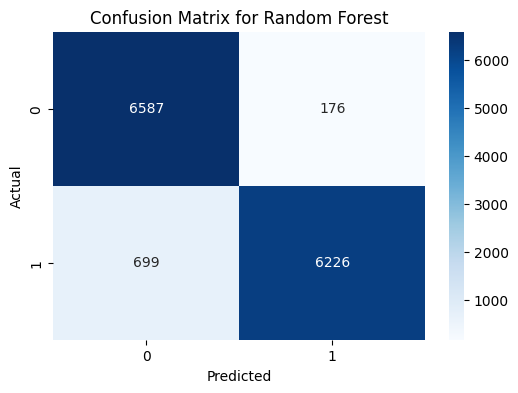


=== Xgboost ===
Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6763
           1       0.97      0.88      0.92      6925

    accuracy                           0.93     13688
   macro avg       0.93      0.93      0.93     13688
weighted avg       0.93      0.93      0.93     13688


Confusion Matrix for Test Set:
[[6586  177]
 [ 824 6101]]


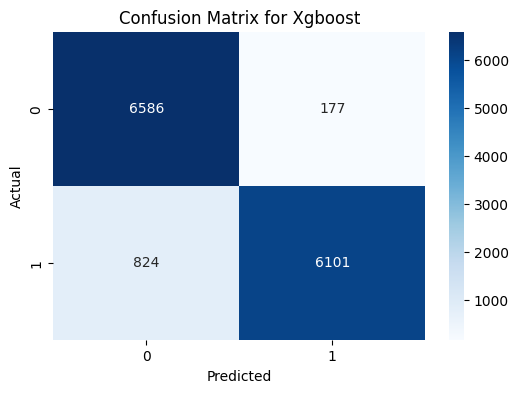

In [65]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_depth=20, bootstrap=True, random_state=42),
    "Xgboost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, subsample=0.8, colsample_bytree=0.8, gamma=0.1, reg_lambda=1, random_state = 42)

}

def fit_score_report(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        model_scores[name] = score

        # Make predictions
        y_pred = model.predict(X_test)

        # Print classification report
        print(f"\n=== {name} ===")
        print(f"Accuracy: {score:.2f}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))

        # Generate a confusion matrix for the test set
        print("\nConfusion Matrix for Test Set:")
        cm = confusion_matrix(y_test, y_pred)
        print(cm)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix for {name}')
        plt.show()

    return model_scores

# Run the function
model_scores = fit_score_report(models, X_train, X_test, y_train, y_test)

In [66]:
# Get best model by accuracy
best_model_name = max(model_scores, key=model_scores.get)
best_score = model_scores[best_model_name]

print(f"\n🔍 Best Model: {best_model_name} with accuracy {best_score:.4f}")



🔍 Best Model: Random Forest with accuracy 0.9361


But wait....the accuracy before tuning was 0.94, but after tuning, it dropped slightly to 0.93. Why? Here's what I  think might have happened:

I used a very small search space
To make things run faster, I limited the hyperparameter ranges. But that could mean the best combination wasn’t even included in the search.

Or...

Defaults might’ve already been strong enough
Especially for models like Random Forest and XGBoost, the default settings are often pretty solid. So tuning may not always lead to improvement.